In [101]:
words = open('names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [102]:
len(words)

32033

In [103]:
min(len(w) for w in words) 

2

In [104]:
max(len(w) for w in words) 

15

BIGRAM LANGUAGE MODEL

In [105]:
b = {}
for w in words:
    char = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(char,char[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1  

In [106]:
sorted(b.items(),key=lambda x : -x[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [107]:
import torch 

In [108]:
N = torch.zeros((27,27),dtype=torch.int32)

In [109]:
chars = sorted(list(set(''.join(words))))
print(chars)
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [110]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [111]:

for w in words:
    char = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(char,char[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1  

In [112]:
N[0,0].item()

0

Visualization of our Tensor

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

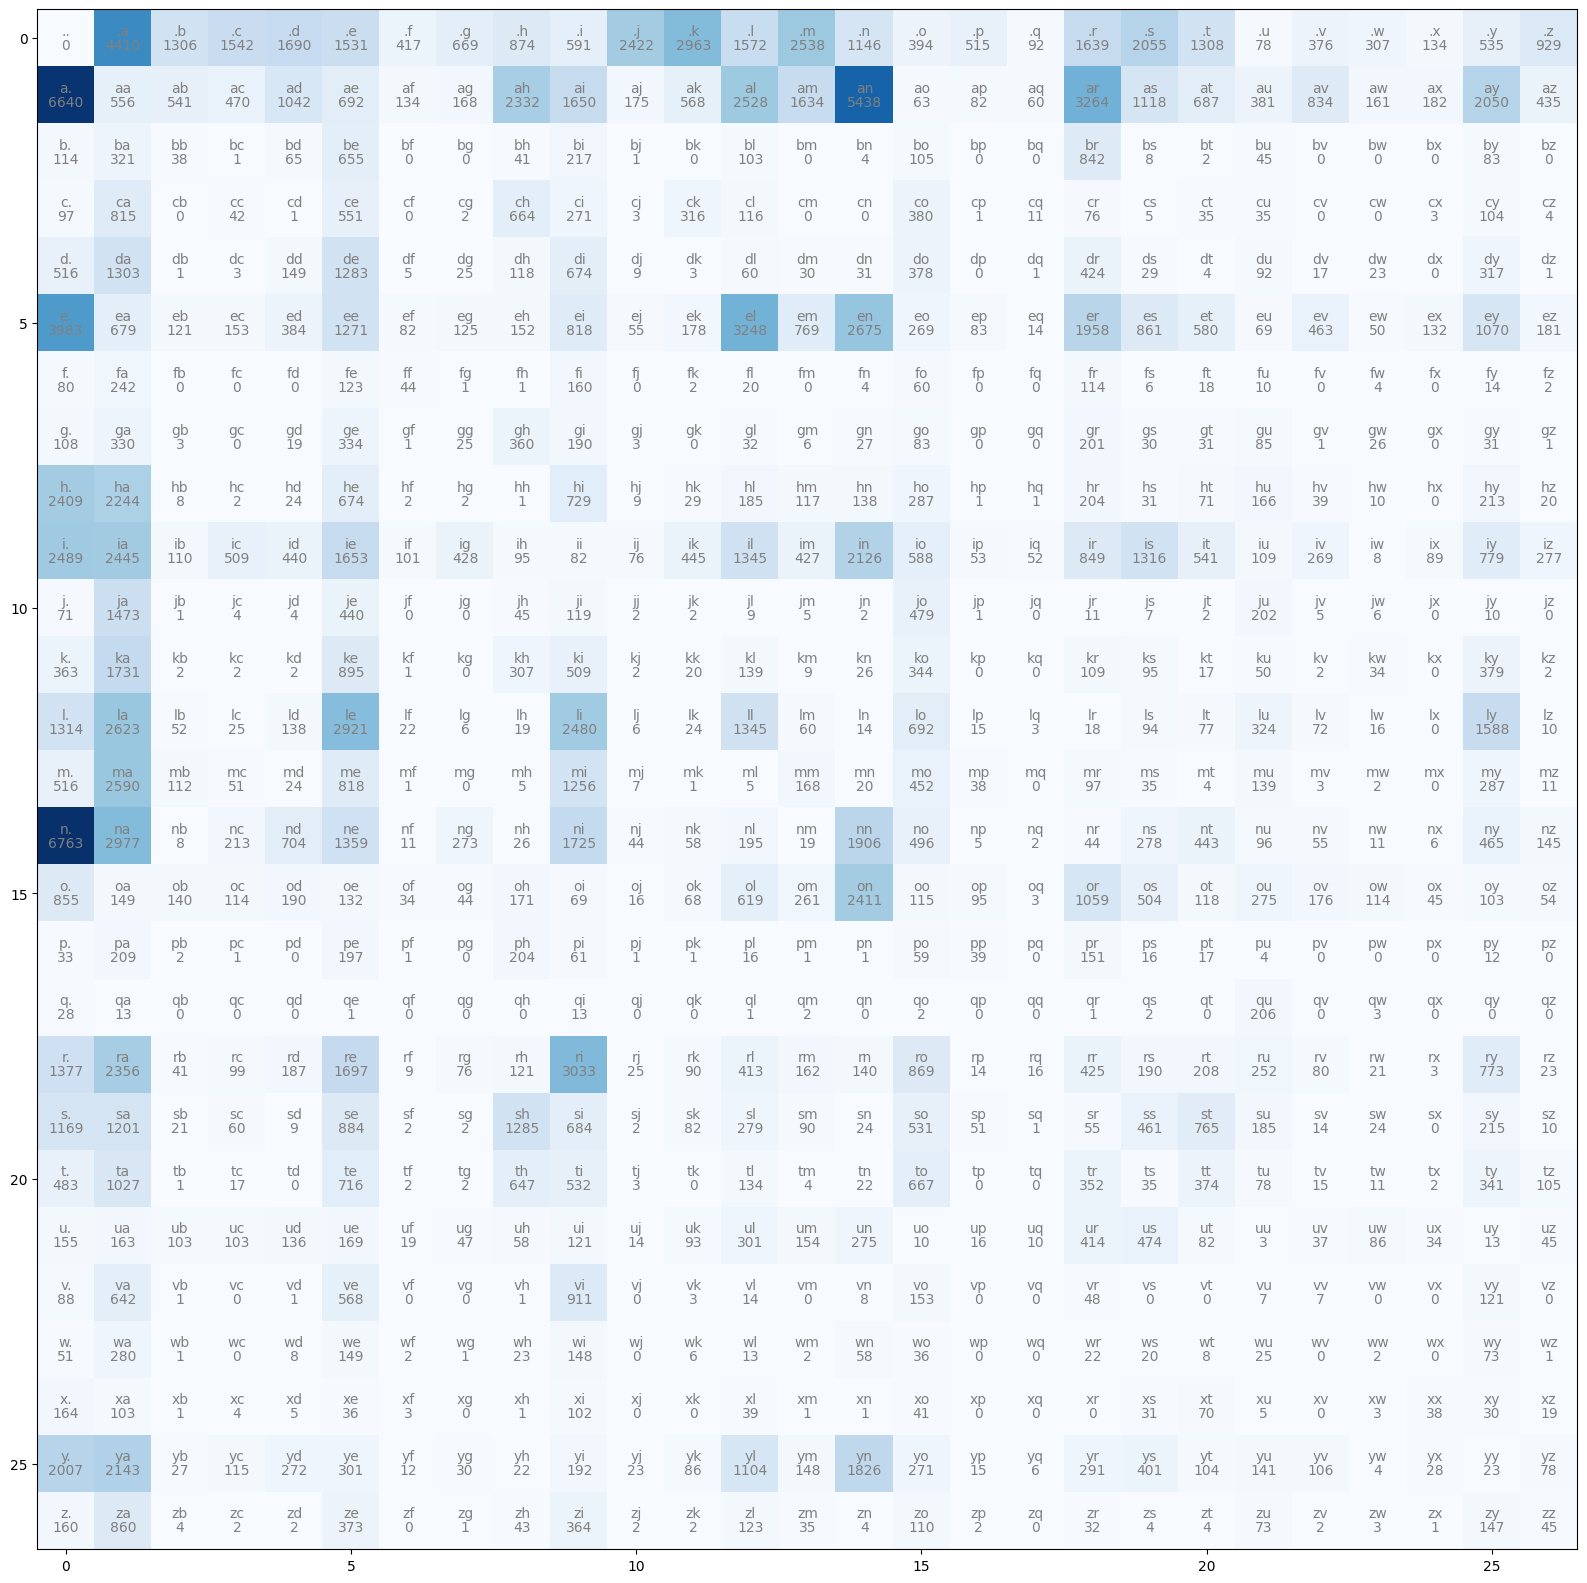

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))
plt.imshow(N,cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i]+itos[j]
        plt.text(j,i,chstr,ha='center',va="bottom",color="gray")
        plt.text(j,i,N[i,j].item(),ha='center',va="top",color="gray")
plt.axes('off')

#Error in the matrix IDK whats causing the issue.

In [117]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [118]:
p = N[0].float()
p = p/p.sum()
p
#Creating a Distribution then we try to sample based on this distribution using torch.multinomial

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

Sampling from a distribution

In [119]:
g = torch.Generator().manual_seed(2147675467) #Seeds a Generator
ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
ix
itos[ix]

'm'

In [120]:
g = torch.Generator().manual_seed(2147675467) #Seeds a Generator
p = torch.rand(3,generator=g)
p = p/p.sum() #When ever i run this cell i keep getting the same output as im using the same generator object thats seeding it
p

tensor([0.0832, 0.3905, 0.5263])

In [121]:
#Using torch Multinomial to draw samples from it
torch.multinomial(p,num_samples=20,replacement=True,generator=g) 

tensor([2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1])

In [122]:
p.shape

torch.Size([3])

In [123]:
P = (N+1).float()
P /= P.sum(1,keepdim=True) #Inplace Operations save memory rather than using memory to create a new variable of a sort
P[1].sum()
#Broadcasting, COpies the counts and does emelemt wise division


tensor(1.)

In [124]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    out = []
    ix = 0
    while True:
        #p=N[ix].float()
        #p = p/p.sum()
        #Optimized 
        
        p = P[ix]
        
        #p = torch.ones(27)/27.0
        #This is a uniform distribution, where everything is equally likely so we get even more jargon
        
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))  

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


Evaluation of the model

In [125]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
    char = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(char,char[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        n+=1
        log_likelihood += logprob
        print(f'{ch1}{ch2}:prob: {prob:4f},logProb: {logprob:.4f}')
nll = -1*log_likelihood
print(f'{log_likelihood=}')
print(f'nll = {-1*log_likelihood}')
print(f'avgnll = {-1*log_likelihood/n}')

.e:prob: 0.047785,logProb: -3.0410
em:prob: 0.037653,logProb: -3.2793
mm:prob: 0.025341,logProb: -3.6753
ma:prob: 0.388514,logProb: -0.9454
a.:prob: 0.195830,logProb: -1.6305
.o:prob: 0.012321,logProb: -4.3965
ol:prob: 0.077880,logProb: -2.5526
li:prob: 0.177404,logProb: -1.7293
iv:prob: 0.015230,logProb: -4.1845
vi:prob: 0.350769,logProb: -1.0476
ia:prob: 0.137974,logProb: -1.9807
a.:prob: 0.195830,logProb: -1.6305
.a:prob: 0.137586,logProb: -1.9835
av:prob: 0.024623,logProb: -3.7041
va:prob: 0.247308,logProb: -1.3971
a.:prob: 0.195830,logProb: -1.6305
log_likelihood=tensor(-38.8086)
nll = 38.80856704711914
avgnll = 2.4255354404449463


In [126]:
#Goal : Maximize the likelihood of data w.r.t modelparameters(Statistical Modeling)
#Equivalent to maximizing the log likelihood(Coz log is monotonic)
#Equivalent to minimizing negative log likelihood and also average negative log likelihood


Creating a NN for this Bigram moodel

In [127]:
#Creating a training data set of bigrams (x,y)
xs,ys = [],[]

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [128]:
xs

tensor([ 0,  5, 13, 13,  1])

In [129]:
ys

tensor([ 5, 13, 13,  1,  0])

In [130]:
import torch.nn.functional as F
xenc = F.one_hot(xs,num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [131]:
xenc.shape

torch.Size([5, 27])

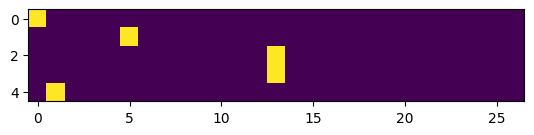

In [132]:
plt.imshow(xenc)

In [133]:
xenc.dtype

torch.float32

In [134]:
W = torch.randn((27,1))
xenc @ W

tensor([[-1.1541],
        [-0.5324],
        [-0.4512],
        [-0.4512],
        [ 1.2801]])

In [135]:
W = torch.randn((27,27))
xenc @ W

tensor([[-1.6052e+00,  9.7919e-01, -1.4587e+00,  8.2467e-02,  6.6908e-01,
          5.5175e-01,  2.3177e-01, -1.1456e+00,  4.2852e-01, -3.8179e-01,
          1.2047e+00,  9.3570e-01, -9.2240e-01,  4.9722e-01, -6.9817e-01,
          8.1304e-01,  3.1728e-01,  8.4003e-01,  1.9448e+00, -7.4139e-01,
          6.9921e-01,  1.3884e+00,  2.4592e-01,  2.6055e-01,  2.5131e-01,
         -1.4382e-01, -9.5797e-01],
        [-1.6928e+00,  1.3568e+00, -2.7256e-01,  5.4717e-01,  7.5912e-01,
          1.0818e-01, -3.0013e-03, -5.7633e-01, -1.1402e+00, -4.7662e-01,
          8.1962e-01,  5.3725e-01,  8.3275e-01, -1.1348e+00, -1.1463e+00,
          2.3926e+00,  3.4911e-01,  3.5571e-01, -2.4389e-01,  9.6935e-01,
         -1.5795e+00,  3.3878e-01, -4.1394e-01,  1.7755e-01,  1.1555e+00,
          2.6324e-01, -3.1362e-01],
        [ 8.9402e-01,  3.8319e-01,  7.2064e-01, -1.5851e+00, -8.8032e-01,
         -2.2744e-01,  2.5130e-01,  4.4350e-01, -1.5986e+00,  7.6333e-01,
         -7.5435e-01,  7.8593e-01, -2.23

In [136]:
logits = xenc @ W #log - counts
counts = logits.exp() #exponentiating the counts
prob = counts/counts.sum(1,keepdim=True)
prob

tensor([[0.0045, 0.0596, 0.0052, 0.0243, 0.0437, 0.0389, 0.0282, 0.0071, 0.0344,
         0.0153, 0.0747, 0.0571, 0.0089, 0.0368, 0.0111, 0.0505, 0.0308, 0.0519,
         0.1566, 0.0107, 0.0451, 0.0898, 0.0286, 0.0291, 0.0288, 0.0194, 0.0086],
        [0.0041, 0.0861, 0.0169, 0.0383, 0.0474, 0.0247, 0.0221, 0.0125, 0.0071,
         0.0138, 0.0503, 0.0379, 0.0510, 0.0071, 0.0070, 0.2426, 0.0314, 0.0316,
         0.0174, 0.0584, 0.0046, 0.0311, 0.0147, 0.0265, 0.0704, 0.0288, 0.0162],
        [0.0372, 0.0223, 0.0313, 0.0031, 0.0063, 0.0121, 0.0196, 0.0237, 0.0031,
         0.0326, 0.0072, 0.0334, 0.0016, 0.0025, 0.0049, 0.0035, 0.0160, 0.1978,
         0.0104, 0.3252, 0.0504, 0.0040, 0.0632, 0.0038, 0.0043, 0.0047, 0.0759],
        [0.0372, 0.0223, 0.0313, 0.0031, 0.0063, 0.0121, 0.0196, 0.0237, 0.0031,
         0.0326, 0.0072, 0.0334, 0.0016, 0.0025, 0.0049, 0.0035, 0.0160, 0.1978,
         0.0104, 0.3252, 0.0504, 0.0040, 0.0632, 0.0038, 0.0043, 0.0047, 0.0759],
        [0.0306, 0.0180,

In [137]:
prob[0]

tensor([0.0045, 0.0596, 0.0052, 0.0243, 0.0437, 0.0389, 0.0282, 0.0071, 0.0344,
        0.0153, 0.0747, 0.0571, 0.0089, 0.0368, 0.0111, 0.0505, 0.0308, 0.0519,
        0.1566, 0.0107, 0.0451, 0.0898, 0.0286, 0.0291, 0.0288, 0.0194, 0.0086])

In [138]:
prob[0].sum().item()

0.9999999403953552

## GEN SUMMARY

In [139]:
xs

tensor([ 0,  5, 13, 13,  1])

In [140]:
ys

tensor([ 5, 13, 13,  1,  0])

In [141]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),generator=g)

In [142]:
xenc = F.one_hot(xs,num_classes=27).float()
logits = xenc @ W

## Next two lines are the softmax function (softmax = (e^x)/summation(e^xi))
counts = logits.exp()
prob = counts / counts.sum(1,keepdim=True)

In [143]:
prob.shape

torch.Size([5, 27])

## Loss function

In [144]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', prob[i])
  print('label (actual next character):', y)
  p = prob[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

## Optimization

In [145]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [146]:
# Forward Pass
xenc = F.one_hot(xs,num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts/counts.sum(1,keepdim=True)
print(probs)
k = probs[torch.arange(5), ys]
print(k)
loss = -probs[torch.arange(5),ys].log().mean()
loss

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

tensor(3.7693, grad_fn=<NegBackward0>)

In [147]:
print(loss.item())

3.7693049907684326


In [148]:
# Backward Pass
W.grad = None
loss.backward()

In [149]:
W.data += -0.1 * W.grad
# Updation of parameters

## Final optimization

In [150]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


Gradient Descent

In [294]:
# gradient descent
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad


2.48307466506958


Sample from NN model

In [296]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
prelay.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabi.
werimikimaynin.
anaasn.
ssorionsush.
